Class Balance (rockfall_risk): Counter({1: 373666, 0: 124934})

Top Features Influencing Rockfall Risk:
SeismicVibration_mm/s     0.391960
crack_density             0.262517
vegetation_green_ratio    0.132558
debris_entropy            0.042024
debris_contrast           0.040714
debris_homogeneity        0.021090
Oct-Dec                   0.006399
OCT                       0.006341
Mar-May                   0.005835
APR                       0.005529
JUN                       0.005527
AUG                       0.005268
Displacement_mm           0.005123
FEB                       0.004914
Strain_micro              0.004780
dtype: float64


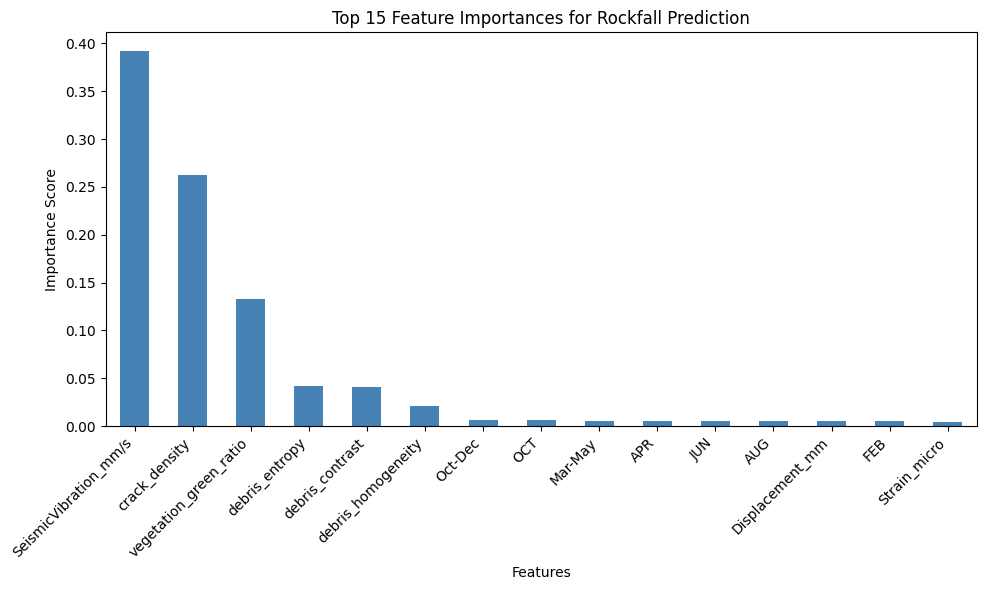

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("../dataset/refined_sih_dataset_ML_ready.csv")

# Drop categorical/non-numeric columns
if "SUBDIVISION" in df.columns:
    df = df.drop(columns=["SUBDIVISION"])

# Define features and target
X = df.drop(columns=["rockfall_risk"])
y = df["rockfall_risk"]

# -----------------------------
# (a) Check class balance
# -----------------------------
class_counts = Counter(y)
print("Class Balance (rockfall_risk):", class_counts)

# -----------------------------
# (b) Train Random Forest for feature importance
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight="balanced", 
    n_jobs=-1
)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("\nTop Features Influencing Rockfall Risk:")
print(feature_importance.head(15))

# -----------------------------
# (c) Plot Feature Importance
# -----------------------------
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind="bar", color="steelblue")
plt.title("Top 15 Feature Importances for Rockfall Prediction")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
